In [1]:
import pandas as pd
df=pd.read_csv("archive (6)/International_Education_Costs.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [3]:
df["Estimated_Living_Cost_USD"] = df["Living_Cost_Index"] * 100

df["Total_Annual_Cost_USD"] = (
    df["Tuition_USD"] / df["Duration_Years"] +
    df["Estimated_Living_Cost_USD"] +
    df["Rent_USD"] +
    df["Visa_Fee_USD"] / df["Duration_Years"] +
    df["Insurance_USD"] / df["Duration_Years"]
)

df[["Country", "City", "University", "Program", "Total_Annual_Cost_USD"]].head()


,Country,City,University,Program,Total_Annual_Cost_USD
0,USA,Cambridge,Harvard University,Computer Science,39080.0
1,UK,London,Imperial College London,Data Science,51865.0
2,Canada,Toronto,University of Toronto,Business Analytics,28667.5
3,Australia,Melbourne,University of Melbourne,Engineering,30070.0
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,8712.5


In [5]:
country_avg_cost = df.groupby("Country")["Total_Annual_Cost_USD"].mean().sort_values()
print(country_avg_cost.tail(10)) 


Country
Netherlands    14674.047619
Hong Kong      15040.000000
Ireland        16836.000000
UAE            17238.437500
Canada         18508.163377
New Zealand    20658.703704
Australia      21566.298450
Singapore      22315.787037
UK             22801.935484
USA            26952.076923
Name: Total_Annual_Cost_USD, dtype: float64


In [6]:
countries_of_interest = ["UK", "USA", "Ireland", "Canada", "Netherlands"]
filtered_df = df[df["Country"].isin(countries_of_interest)]

country_avg_cost = filtered_df.groupby("Country")["Total_Annual_Cost_USD"].mean().sort_values()

print(country_avg_cost)


Country
Netherlands    14674.047619
Ireland        16836.000000
Canada         18508.163377
UK             22801.935484
USA            26952.076923
Name: Total_Annual_Cost_USD, dtype: float64


In [7]:
filtered_df["Estimated_Living_Cost_USD"] = filtered_df["Living_Cost_Index"] * 100

filtered_df["Total_Annual_Cost_USD"] = (
    filtered_df["Tuition_USD"] / filtered_df["Duration_Years"] +
    filtered_df["Estimated_Living_Cost_USD"] +
    filtered_df["Rent_USD"] +
    filtered_df["Visa_Fee_USD"] / filtered_df["Duration_Years"] +
    filtered_df["Insurance_USD"] / filtered_df["Duration_Years"]
)
country_avg_cost = filtered_df.groupby("Country")["Total_Annual_Cost_USD"].mean().sort_values()

print(country_avg_cost)

Country
Netherlands    14674.047619
Ireland        16836.000000
Canada         18508.163377
UK             22801.935484
USA            26952.076923
Name: Total_Annual_Cost_USD, dtype: float64


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2092\3033996132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Estimated_Living_Cost_USD"] = filtered_df["Living_Cost_Index"] * 100
C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2092\3033996132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Total_Annual_Cost_USD"] = (


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2092\271118994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_avg_cost.index, y=country_avg_cost.values, palette="viridis")


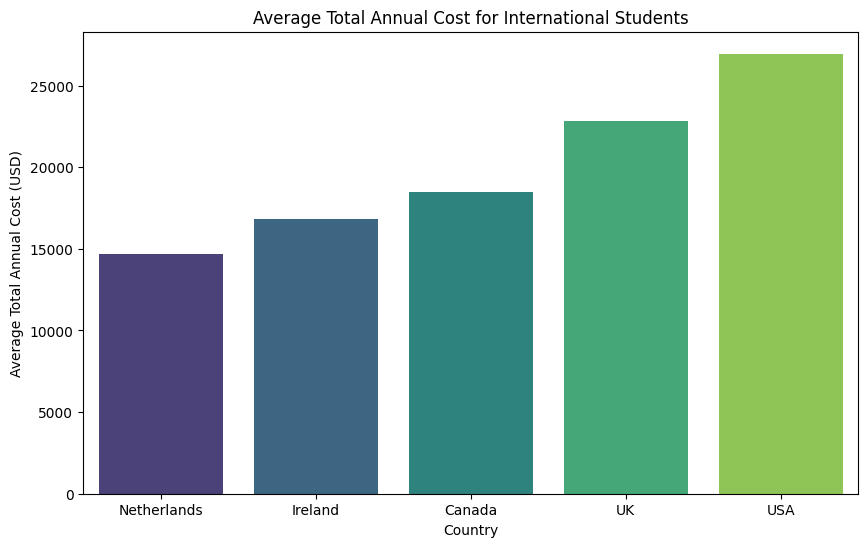

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=country_avg_cost.index, y=country_avg_cost.values, palette="viridis")
plt.title("Average Total Annual Cost for International Students")
plt.xlabel("Country")
plt.ylabel("Average Total Annual Cost (USD)")
plt.show()

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2092\4169460635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Total_Annual_Cost_USD', data=filtered_df, palette='Set2')


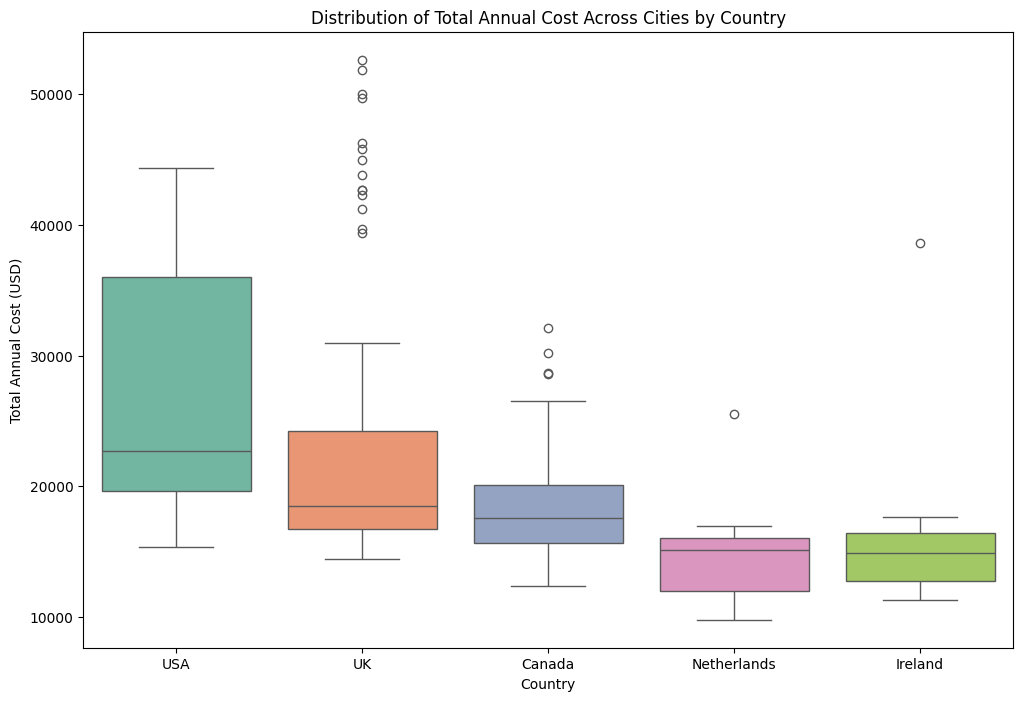

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Total_Annual_Cost_USD', data=filtered_df, palette='Set2')
plt.title('Distribution of Total Annual Cost Across Cities by Country')
plt.xlabel('Country')
plt.ylabel('Total Annual Cost (USD)')
plt.show()


In [12]:
top_5_expensive_programs = filtered_df[['Program', 'Total_Annual_Cost_USD']].sort_values(by='Total_Annual_Cost_USD', ascending=False).head(5)

print(top_5_expensive_programs)


              Program  Total_Annual_Cost_USD
398      Data Science                52615.0
1        Data Science                51865.0
101  Computer Science                50005.0
448  Computer Science                49715.0
458  Computer Science                46265.0


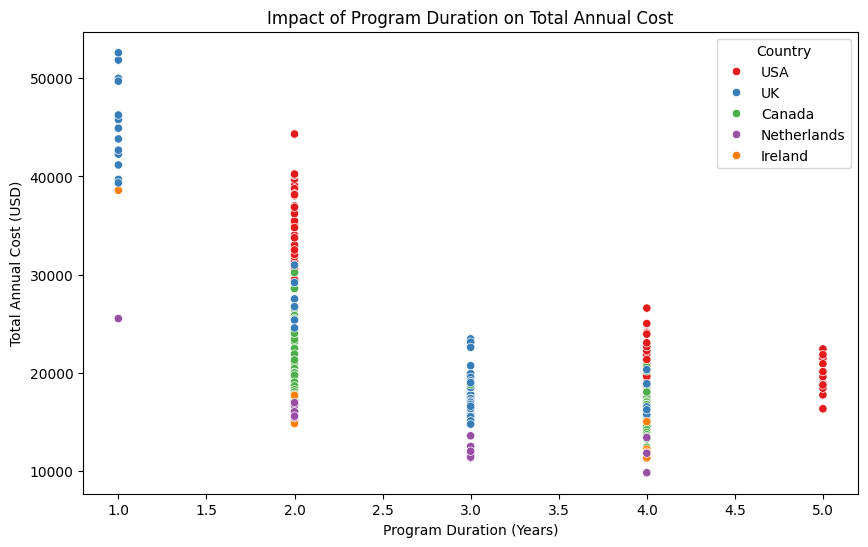

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_Years', y='Total_Annual_Cost_USD', data=filtered_df, hue='Country', palette='Set1')
plt.title('Impact of Program Duration on Total Annual Cost')
plt.xlabel('Program Duration (Years)')
plt.ylabel('Total Annual Cost (USD)')
plt.show()


In [14]:
top_5_expensive_universities = filtered_df.groupby('University')['Total_Annual_Cost_USD'].mean().sort_values(ascending=False).head(5)

print(top_5_expensive_universities)


University
University of Salford      43825.000000
Columbia University        42796.666667
Imperial College London    42643.333333
UWE Bristol                42275.000000
Harvard University         39660.000000
Name: Total_Annual_Cost_USD, dtype: float64


In [15]:

filtered_df.to_csv("filtered_university_data_for_visualization.csv", index=False)

print(filtered_df.head())


        Country       City               University                  Program  \
0           USA  Cambridge       Harvard University         Computer Science   
1            UK     London  Imperial College London             Data Science   
2        Canada    Toronto    University of Toronto       Business Analytics   
6   Netherlands  Amsterdam  University of Amsterdam  Artificial Intelligence   
14      Ireland     Dublin   Trinity College Dublin           Data Analytics   

     Level  Duration_Years  Tuition_USD  Living_Cost_Index  Rent_USD  \
0   Master             2.0        55400               83.5      2200   
1   Master             1.0        41200               75.8      1800   
2   Master             2.0        38500               72.5      1600   
6   Master             1.0        15800               73.2      1500   
14  Master             1.0        28900               72.9      1600   

    Visa_Fee_USD  Insurance_USD  Exchange_Rate  Estimated_Living_Cost_USD  \
0        